# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Откройте файл с данными и изучите общую информацию. 

Для начала изучим представленные нам данные. Начнём с того что создадим датафрейм с данными (назовём его data), выведем его 5 первых и 5 последних строк. После общую информацию о таблице. И попробуем построить общую гистограмму для всех числовых столбцов таблицы. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', 
                   sep='\t') #вносим в код разделитель данных '\t'
data.head(5) #выводим первые 5 строк данных`

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.tail(5) #выводим последние 5 строк данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info() #выводим общую информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

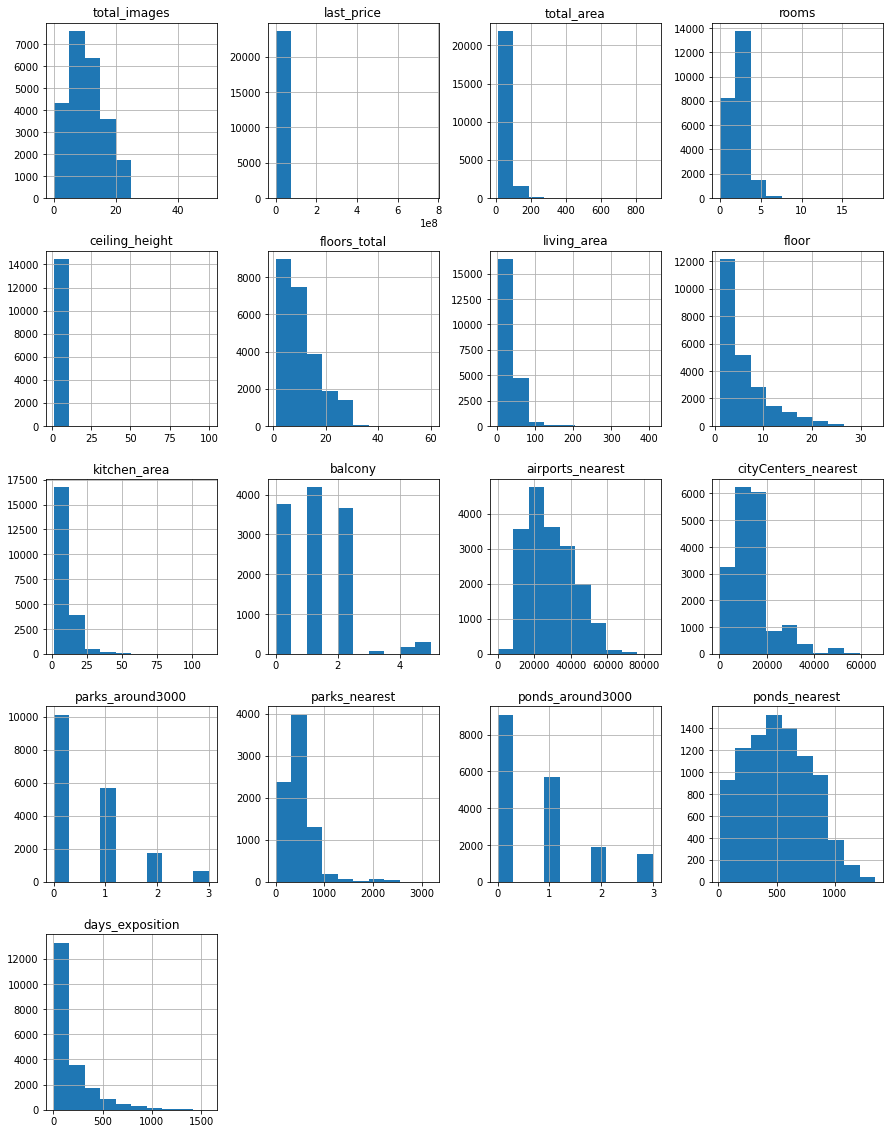

In [5]:
#построим общую гистограмму для всех числовых столбцов таблицы
data.hist(figsize=(15, 20));

Итак, мы видим что всего имеется информация о 23699 объектах недвижимости представленная в 22 колонках. В 17 из 22 колонок представлены числовые значения, которые находся в подходящем для построения графиков типе данных. В большей части колонок присутствуют пропуски:

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    floors_total — всего этажей в доме
    is_apartment — есть ли апартаменты 
    kitchen_area — площадь кухни в квадратных метрах (м²)
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name —название населённого пункта
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
Обычно для исследования нам понадобится либо заполнить пропуски медианными значениями, либо исключить все их данные из исследования. Однако, мы считаем что заполнить колонки адекватными медианными значениями не получится. Во-первых, у нас чуть больше пары десятков тысяч данных, мы считаем это мало. Во-вторых, мы имеем дело с областью где застройка совмещает несколько исторических типов жилья, а в разные времена даже потолки делали разной высотой (а данных о типе жилого помещения мы не имеем), более того у нас также данные не только одного большого города, но также и данные деревень и посёлков. 

Отдельно стоит сказать про заполнение колонки is_apartment. С одной стороны, можно подумать что при заполнение владельца жилья просто не заполняли этот параметр если у них нет апартаментов и все пропуски можно интерпретировать как False, т.е. то что апартаментов нет. Но мы с этим не согласны. Мы считаем что данная таблица, когда она только начала заполняться ещё не имела всех своих столбцов. Мы делаем этот вывод на основе следующего анализа. Если собрать вместе 4 столбца этой таблицы: parks_around3000, ponds_around3000, airports_nearest и cityCenters_nearest (имеющих от 18157 до 18181 заполненных строчек), и удалить из новового датафрейма все пропуски, мы получим датайрейм со 18156 строками (т.е. пропусков было очень мало). 

In [6]:
around_df = data[['parks_around3000','ponds_around3000',
                  'airports_nearest','cityCenters_nearest']].copy()
around_df=around_df.dropna()
around_df.isna().sum()
around_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18156 entries, 0 to 23697
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parks_around3000     18156 non-null  float64
 1   ponds_around3000     18156 non-null  float64
 2   airports_nearest     18156 non-null  float64
 3   cityCenters_nearest  18156 non-null  float64
dtypes: float64(4)
memory usage: 709.2 KB


Это наводит нас на мысль что столбцы прибавлялись к датафрейму постепенно, и скорее всего самым последним был добавлен is_apartment, поэтому все пропуски в этом столбце скорее всего по настоящему не известные данные и заполнять их будет некорректно. 

Помимо пропусков в данных скорее всего есть и аномальные значения. По мере необходимости в исследование мы просто найдем и исключим их из данных. Отдельно отметим, что мы не можем удалить все аномалии которые найдём с помощью квартильного анализа, так как это удалит больше 10% всех данных (мы заранее проверили). Поэтому от аномалий будем избавляться вручную просматривая данные через графики.

Также часть данных имеет неправильный или сомнительный тип данных. Так например:

    first_day_exposition содержит тип object а нужно datetime (т.к. там содержатся данные времени)
    is_apartment содержит тип object а нужно bool (т.к. данный столбец содержит булевые значения)
    floors_total содержит тип float а нужно int (так как количество этажей это целое число)
    parks_around3000 содержит тип float а нужно int (так как количество парков это целое число)
    ponds_around3000 содержит тип float а нужно int (так как количество водоёмов это целое число)
    days_exposition содержит тип float а нужно int (так как количество дней это целое число)
    balcony содержит тип float а нужно int (так как количество балконов это целое число)
Сделаем оговорку, мы считаем что для дальнейшего исследования не обязательно менять всем данным их тип на нужный. Так математические операции можно провести и с данными float, а не int. Однако, следует проверить каждый из этих столбцов, так как возможно, что среди этих данных попадаются дробные значения количества балконов или количества дней. Такие данные, если они будут, следует исключить из анализа.

Также мы можем заметить что у нас имеется столбец locality_name в котором тип данных object (как и должно быть). Этот столбец содержит данные с названиями населённого пункта объекта недвижимости. Этот столбец надо будет также изучить отдельно, так как нам не известно заполнялся ли он самими пользователями полностью вручную, либо они могли выбирать из заранее подготовленного списка населённых пунктов своей области. Так как в первом случае, возможно что один и тот же населенный пункт был указан с разными именами, что в свою очередь может повредить нашему исследованию данных.

## Предобработка данных

### Устранение явных дубликатов 

Сначала проверим данные на явные дубликаты. Однако, в случае их обнаружения, мы столкнемся со сложным выбором. Дело в том, что нам не известны полные адреса объектов недвижимости, поэтому если в одном многоквартирном доме два собственника в один день решат продать свои квартиры, находящиеся на одном этаже, и эти квартиры купит какая-нибудь компания в один день по одной цене, то наш код распознает эти объявления как дубликаты. Скорее всего то, что мы описали будет статистической редкостью, поэтому наш дубликат будет технической ошибкой и его можно будет удалить.

In [9]:
data.duplicated().sum()

0

Ура, явных дубликатов нет и нам не придется делать сложный выбор.

### Предобработка данных в столбце locality_name 

В нашем датафрейме существует столбец locality_name (содержащий название населённого пункта), в нем потенциально могут присутствовать разные вариации (неявные дубликаты) имени одного и того же населенного пункта. Выявим эти вариации и приведем их к одному варианту, если они есть, так как это позволит нам сравнивать ценыи и другие показатели в каком-либо населённом пункте. Выведем список всех уникальных значений в этом столбце. А также количество этих значений.

In [10]:
locality_name=data['locality_name'].sort_values().unique()
print(locality_name)
print('Количество:', data['locality_name'].nunique())
#отметим, что nunique() не включает в подсчёт NaN

['Бокситогорск' 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Высоцк'
 'Гатчина' 'Зеленогорск' 'Ивангород' 'Каменногорск' 'Кингисепп' 'Кириши'
 'Кировск' 'Колпино' 'Коммунар' 'Красное Село' 'Кронштадт' 'Кудрово'
 'Лодейное Поле' 'Ломоносов' 'Луга' 'Любань' 'Мурино' 'Никольское'
 'Новая Ладога' 'Отрадное' 'Павловск' 'Петергоф' 'Пикалёво' 'Подпорожье'
 'Приморск' 'Приозерск' 'Пушкин' 'Санкт-Петербург' 'Светогорск'
 'Сертолово' 'Сестрорецк' 'Сланцы' 'Сосновый Бор' 'Сясьстрой' 'Тихвин'
 'Тосно' 'Шлиссельбург' 'городской поселок Большая Ижора'
 'городской поселок Янино-1' 'городской посёлок Будогощь'
 'городской посёлок Виллози' 'городской посёлок Лесогорский'
 'городской посёлок Мга' 'городской посёлок Назия'
 'городской посёлок Новоселье' 'городской посёлок Павлово'
 'городской посёлок Рощино' 'городской посёлок Свирьстрой'
 'городской посёлок Советский' 'городской посёлок Фёдоровское'
 'городской посёлок Янино-1' 'деревня Агалатово' 'деревня Аро'
 'деревня Батово' 'деревня Бегуницы' 'деревн

Список оказался большим и неудобным, найти возможные неявные дубликаты глазами сложно. Поэтому создадим список уникальных значений без слов “деревня”, “посёлок” и прочих, оставив только названия населённых пунктов. Можно заметить, что названия начинаются с прописной буквы, а слова “деревня”, “посёлок” и прочие со строчной. Используем эту особенность. Отсеем в отдельный список name все названия. Также проверим количество элементов в новом списке. 

In [11]:
name=[]
# напишем функцию для поиска номера индекса символа 
# написанного в верхнем регистре, 
# т.е. индекса прописной буквы
def getindices(s): 
    return [i for i, c in enumerate(s) if c.isupper()]
# применим нашу функцию в цикле используя 
# конструкцию try except, так как в уникальных значениях 
# есть NaN, и наш цикл не сможет по нему пройтись 
try:
    for index in locality_name:
        number = getindices(index)
        index=index[number[0]:] # в некоторых словах несколько больших букв, например 
        name.append(index)      # Санкт-Петербург, поэтому используем нулевой индекс
except:                         
    pass
print(f'Новый список: {name}\nКоличество: {len(name)}')

Новый список: ['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'Большая Ижора', 'Янино-1', 'Будогощь', 'Виллози', 'Лесогорский', 'Мга', 'Назия', 'Новоселье', 'Павлово', 'Рощино', 'Свирьстрой', 'Советский', 'Фёдоровское', 'Янино-1', 'Агалатово', 'Аро', 'Батово', 'Бегуницы', 'Белогорка', 'Большая Вруда', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Ваганово', 'Вартемяги', 'Вахнова Кара', 'Выскатка', 'Гарболово', 'Глинка', 'Горбунки', 'Гостилицы'

Количество элементов не изменилось, значит потерь нет. Теперь посмотрим на дубликаты из списка name и их количество.  

In [12]:
#создадим для дубликатов новый список
doublons_name=list(set(n for n in name if name.count(n) > 1)) 
print(f'Список дубликатов: {doublons_name}\nКоличество: {len(doublons_name)}')

Список дубликатов: ['Ильичёво', 'Усть-Луга', 'Сумино', 'Фёдоровское', 'Советский', 'Щеглово', 'Рябово', 'Стеклянный', 'Янино-1', 'Назия', 'Красный Бор', 'Новый Свет', 'Калитино', 'Аннино', 'Громово', 'Никольское', 'Коробицыно', 'Мичуринское', 'Гарболово', 'Свердлова', 'Лисий Нос', 'Поляны', 'Кузьмоловский', 'Лебяжье', 'Павлово', 'Бугры', 'Рахья', 'Петровское', 'Пансионат Зелёный Бор', 'Любань', 'Зимитицы', 'Рощино', 'Мга', 'Рабитицы', 'Кудрово', 'Тельмана', 'Вещево', 'Жилгородок', 'Форносово', 'Лесогорский', 'Возрождение', 'Кобралово', 'Гаврилово', 'Старая Малукса', 'Приветнинское', 'Перово', 'Токсово', 'Терволово', 'Большая Ижора', 'Мельниково', 'Победа', 'Вырица', 'Приладожский', 'Мурино', 'Лесное']
Количество: 55


Разумно предположить что не все полученные дубликаты являются дубликатами. Так например в одной области вполне может существовать и село и посёлок с одним названием. Поэтому надо вывести все элементы из первоначального списка уникальных значений, которые содержат в названиях найденные нами дубликаты.

In [13]:
doublons_locality_name=[]
for index in doublons_name:
    for names in locality_name:     
# используtv конструкцию try except, так как в уникальных значениях 
# есть NaN, и наш цикл не сможет по нему пройтись 
        try:
            if index in names:
                doublons_locality_name.append(names)
        except:
            pass
print(doublons_locality_name)

['поселок Ильичёво', 'посёлок Ильичёво', 'поселок Усть-Луга', 'посёлок Усть-Луга', 'поселок Сумино', 'посёлок Сумино', 'городской посёлок Фёдоровское', 'деревня Фёдоровское', 'городской посёлок Советский', 'поселок городского типа Советский', 'деревня Щеглово', 'посёлок Щеглово', 'поселок Рябово', 'поселок городского типа Рябово', 'посёлок городского типа Рябово', 'поселок Стеклянный', 'посёлок Стеклянный', 'городской поселок Янино-1', 'городской посёлок Янино-1', 'городской посёлок Назия', 'поселок городского типа Назия', 'поселок городского типа Красный Бор', 'посёлок городского типа Красный Бор', 'поселок Новый Свет', 'посёлок Новый Свет', 'деревня Калитино', 'поселок Калитино', 'поселок Аннино', 'посёлок Аннино', 'поселок Громово', 'посёлок станции Громово', 'Никольское', 'село Никольское', 'поселок Коробицыно', 'посёлок Коробицыно', 'поселок Мичуринское', 'посёлок Мичуринское', 'деревня Гарболово', 'поселок Гарболово', 'поселок городского типа имени Свердлова', 'посёлок городского

Большинство дубликатов возникло из-за написание слов либо через “е” либо через “ё”. Некоторые дубликаты нас смутили, например: “Мурино”' и “поселок Мурино”. Изучив данные в Интернете, мы обнаружили что в случае “Мурино” и других подобных это одни и теже поселения, а не похожие в названиях но разные населенные пункты. Поэтому всё это считаем дубликатами. Заменим все эти дубликаты в датафрейме на их короткие версии, т. е. те что хранятся в списке doublons_name

In [14]:
for index in data['locality_name']:
    for names in doublons_name:
# используtv конструкцию try except, так как в уникальных значениях 
# есть NaN, и наш цикл не сможет по нему пройтись 
        try:
            if names in index:
                data['locality_name']=data['locality_name'].replace(index,names)
        except:
            pass
print('Новое количество уникальных названий:', data['locality_name'].nunique()) 

Новое количество уникальных названий: 305


### Приведение колонок к нужным типам данных

Часть данных имеет неправильный или сомнительный тип данных. Так например:

    first_day_exposition содержит тип object а нужно datetime (т.к. там содержатся данные времени)
    is_apartment содержит тип object а нужно bool (т.к. данный столбец содержит булевые значения)
    floors_total содержит тип float а нужно int (так как количество этажей это целое число)
    parks_around3000 содержит тип float а нужно int (так как количество парков это целое число)
    ponds_around3000 содержит тип float а нужно int (так как количество водоёмов это целое число)
    days_exposition содержит тип float а нужно int (так как количество дней это целое число)
    balcony содержит тип float а нужно int (так как количество балконов это целое число)

Приведем колонку first_day_exposition к типу данных datetime.  

In [15]:
# так как нам нужна дата публикации без указания времени суток, 
# мы переведём данные в формат: год - месяц - день 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],
                                              format = '%Y-%m-%d')
# проверим наши изменения
print(data['first_day_exposition'].head(3))

0   2019-03-07
1   2018-12-04
2   2015-08-20
Name: first_day_exposition, dtype: datetime64[ns]


Приведем колонку is_apartment к типу данных bool. Но сначала посмотрим какие вообще значения содержит эта колонка. Так как в самом начале обзора датафрейма в этой колонке были только пропуски. 

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

Булевые значения имеются, а прочих нет. Поэтому можем изменять тип данных.

Однако мы вынуждены признать, что изменить тип данных нам не удалось. Так или иначе разные методы либо превращали пустые значения nan в True или False, или просто не срабатывали, выдавали ошибку и тип данных так и оставался object.

Но мы можем работать с данным столбцом и не меняя его тип данных. Так как в нём булевые значения записаны как булевые значения (а не как строковые), мы можем без проблем обращаться к этим значения в будущем, не боясь что булевые значения будут не распознаны.  

В следующих столбцах, где тип данных float нужно было сменить на int, также либо не удалось изменить тип данных либо изменение происходило с искажениями, когда пропуски заполнялись 0 и таким образом становились неотличимы от реальных 0 в данных (т.е. в одно множество могли попасть и квартиры без балконов и те квартиры где количество балконов было не указано). Так как наше исследование может проводиться и с типом данных float, мы сфокусируемся на анализе каждого столбца в отдельности, чтобы исключить из данных сомнительные показатели. 

### Проверка столбцов с типом float, где должен быть int

У нас имеется пять столбцов с типом float, а должен быть там int:

    floors_total 
    parks_around3000 
    ponds_around3000 
    balcony
    days_exposition
Посмотрим уникальные значения и их количество в каждом из этих столбцов, и если там будут сомнительные показатели, удалим их из данных.

In [17]:
print(data['floors_total'].value_counts(dropna=False)) #количество этажей в доме

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64


Можно заметить что среди значений есть NaN и их мало. Поэтому можем удалить эти пропуски из наших данных. После попытаемся привести этот столбец к типу int, без NaN это должно получиться.

In [18]:
print(data.shape[0])
data=data.dropna(subset=['floors_total'])
data['floors_total']=data['floors_total'].astype('int')
print(data.shape[0])
data.dtypes['floors_total'] 

23699
23613


dtype('int64')

Изменить тип данных получилось. Также среди количества этажей в доме выбиваются аномальные значения присутствующие в единичном экземпляре:52 и 60. Есть сомнения что дома с 52 и 60 этажами существуют в изучаемой области. В любом случае это аномальные значения которые стоит удалить.

In [19]:
print(data.shape[0])
data = data[data['floors_total'].isin([52, 60])==False]
print(data.shape[0]) #проверим количество строк

23613
23611


Проверим также столбец parks_around3000

In [20]:
print(data['parks_around3000'].value_counts(dropna=False)) #число парков в радиусе 3 км

0.0    10064
1.0     5656
NaN     5508
2.0     1738
3.0      645
Name: parks_around3000, dtype: int64


Ничего сомнительного не обнаружено.Пропусков же слишком много, поэтому удалять их не будем, иначе это исказит дальнейшее исследование. 

Проверим также столбец ponds_around3000

In [21]:
print(data['ponds_around3000'].value_counts(dropna=False)) #число водоёмов в радиусе 3 км

0.0    9043
1.0    5677
NaN    5508
2.0    1886
3.0    1497
Name: ponds_around3000, dtype: int64


Ничего сомнительного не обнаружено. Пропусков же слишком много, поэтому удалять их не будем, иначе это исказит дальнейшее исследование.

Проверим также столбец balcony

In [22]:
print(data['ponds_around3000'].value_counts(dropna=False)) #число балконов

0.0    9043
1.0    5677
NaN    5508
2.0    1886
3.0    1497
Name: ponds_around3000, dtype: int64


Ничего сомнительного не обнаружено. Пропусков же слишком много, поэтому удалять их не будем, иначе это исказит дальнейшее исследование.

Посмотрим на распределение данных в столбце days_exposition

<AxesSubplot:ylabel='Frequency'>

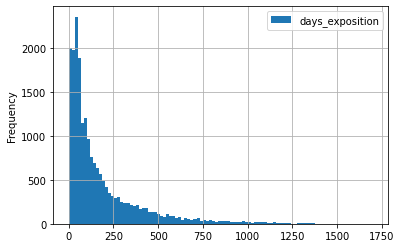

In [26]:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(0,1700))

Посмотрим подробнее на хвост. 

<AxesSubplot:ylabel='Frequency'>

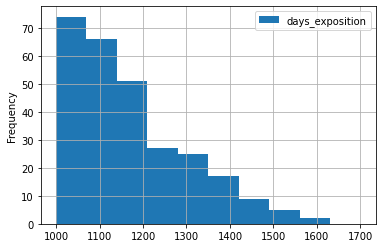

In [27]:
data.plot(y='days_exposition', kind='hist', bins=10, grid=True, range=(1000,1700))

Посмотрим ещё ближе.

<AxesSubplot:ylabel='Frequency'>

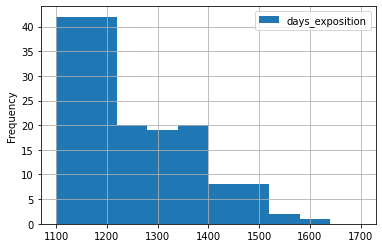

In [28]:
data.plot(y='days_exposition', kind='hist', bins=10, grid=True, range=(1100,1700))

Мы считаем что отрезок примерно с 1220 можно удалить как выбросы, которых хоть и мало, однако они имеют высокие числовые значения, и будут влиять на дальнейшие подсчёты. 

In [29]:
print(data.shape[0])
data=data.loc[(data['days_exposition'].isna()) | (data['days_exposition']<1220)]
print(data.shape[0])

23611
23533


Мы проверили и скорректировали важные столбцы с float, теперь проверим прочие важные столбцы.

### Проверка других важных столбцов

Для нашего исследования нам понадобится рассмотреть на наличие сомнительных данных или выбросов следующие параметры: 

    цена объекта - столбец last_price
    общая площадь - столбец total_area
    жилая площадь - столбец living_area
    площадь кухни - столбец kitchen_area
    количество комнат - столбец rooms
С помощью гистограммы и describe() посмотрим на столбец last_price.

count    2.353300e+04
mean     6.529596e+06
std      1.091007e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.630000e+06
75%      6.750000e+06
max      7.630000e+08
Name: last_price, dtype: float64


<AxesSubplot:ylabel='Frequency'>

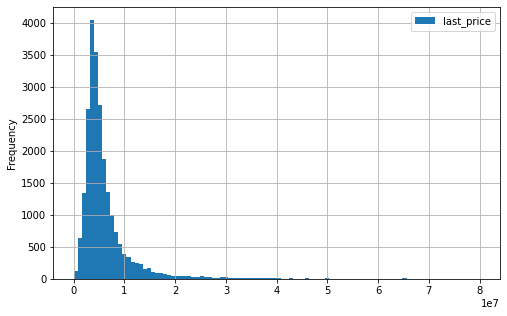

In [30]:
print(data['last_price'].describe())
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize =(8,5), range=(0,80000000))

Посмотрим ещё ближе.

<AxesSubplot:ylabel='Frequency'>

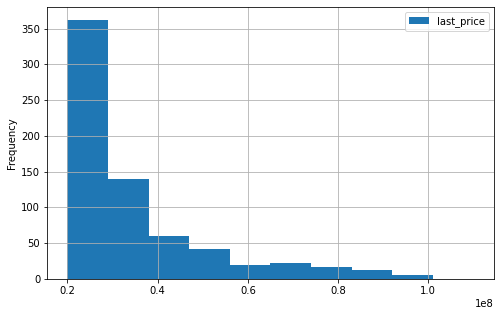

In [31]:
data.plot(y='last_price', kind='hist', bins=10, grid=True, range=(20000000,110000000), figsize =(8,5))

<AxesSubplot:ylabel='Frequency'>

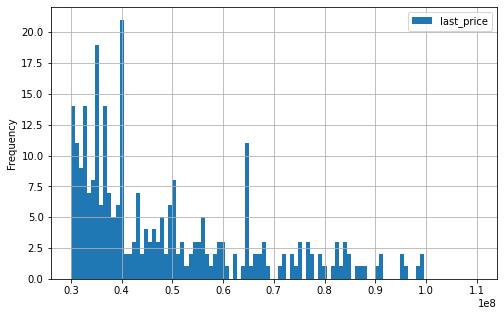

In [32]:
data.plot(y='last_price', kind='hist', bins=100, grid=True, range=(30000000,110000000), figsize =(8,5))

Мы считаем что отрезок примерно с 40000000 (на графике выше это 0,4) можно удалить как выбросы, которых хоть и мало, однако они имеют высокие числовые значения, и будут влиять на дальнейшие подсчёты.

In [33]:
print(data.shape[0])
data=data.loc[(data['last_price'].isna()) | (data['last_price']<38000000)]
print(data.shape[0])

23533
23320


Далее изучим общую площадь, т.е. столбец total_area. Также сделаем это с помощью гистограммы и метода describe.

count    23320.000000
mean        58.693313
std         29.523494
min         12.000000
25%         40.000000
50%         51.700000
75%         68.800000
max        470.300000
Name: total_area, dtype: float64


<AxesSubplot:ylabel='Frequency'>

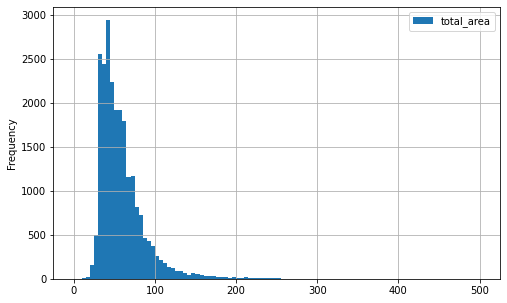

In [34]:
print(data['total_area'].describe())
data.plot(y='total_area', kind='hist', bins=100, grid=True, range=(0,500), figsize =(8,5))

Рассмотрим хвост подробнее

<AxesSubplot:ylabel='Frequency'>

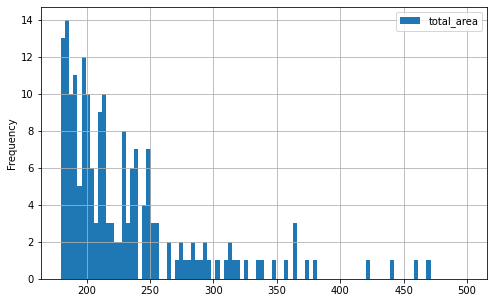

In [35]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, range=(180,500), figsize =(8,5))

Удалим выбросы с примерно с 260.

In [36]:
print(data.shape[0])
data=data.loc[(data['total_area'].isna()) | (data['total_area']<260)]
print(data.shape[0])

23320
23286


У total_area есть также какие-то выбросы в самом начале графика. Рассмотрим их. 

<AxesSubplot:ylabel='Frequency'>

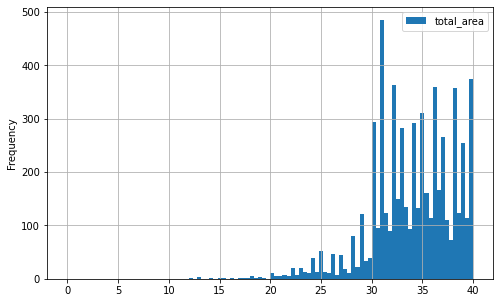

In [37]:
data.plot(y='total_area', kind='hist', bins=100, grid=True, range=(0,40), figsize =(8,5))

Удалим редкие значения с 0 до 20.

In [38]:
print(data.shape[0])
data=data.loc[(data['total_area'].isna()) | (data['total_area']>20)]
print(data.shape[0])

23286
23251


Далее изучим жилую площадь, т.е. столбец living_area. Также сделаем это с помощью гистограммы и метода describe.

count    21428.000000
mean        33.424037
std         18.238712
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        200.000000
Name: living_area, dtype: float64


<AxesSubplot:ylabel='Frequency'>

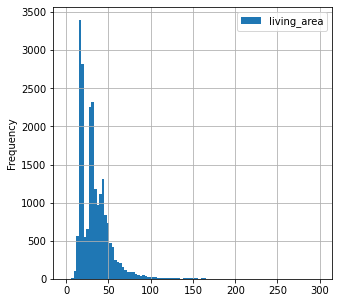

In [39]:
print(data['living_area'].describe())
data.plot(y='living_area', kind='hist', bins=100, grid=True, range=(0,300), figsize =(5,5))

Наблюдается некоторая странность. Есть ямка. Рассмотрим её детальнее.

<AxesSubplot:ylabel='Frequency'>

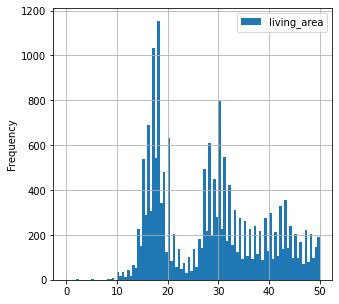

In [40]:
data.plot(y='living_area', kind='hist', bins=100, grid=True, range=(0,50), figsize =(5,5))

Возможно тут отображаются разные исторические варианты планировки. В любом случае исследование этого не входит в нашу задачу, однако может быть исследовано в дальнейшем с привлечением большего количества данных.

Также мы видим редкие значения что 10. Удалим их как выбросы. 

In [41]:
print(data.shape[0])
data=data.loc[(data['living_area'].isna()) | (data['living_area']>10)]
print(data.shape[0])

23251
23201


Далее рассмотрим хвост графика.

<AxesSubplot:ylabel='Frequency'>

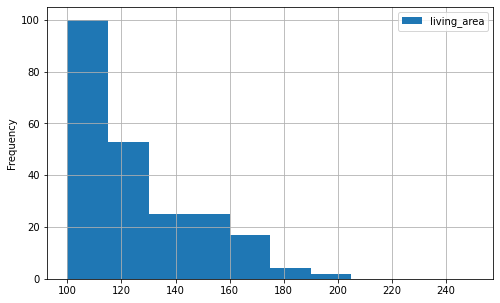

In [42]:
data.plot(y='living_area', kind='hist', bins=10, grid=True, range=(100,250), figsize =(8,5))

Удалим данные со 140 как выбросы.

In [43]:
print(data.shape[0])
data=data.loc[(data['living_area'].isna()) | (data['living_area']<140)]
print(data.shape[0])

23201
23141


Далее изучим площадь кухни, т.е. столбец kitchen_area. Также сделаем это с помощью гистограммы и метода describe.

count    20984.000000
mean        10.295654
std          5.101968
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         70.000000
Name: kitchen_area, dtype: float64


<AxesSubplot:ylabel='Frequency'>

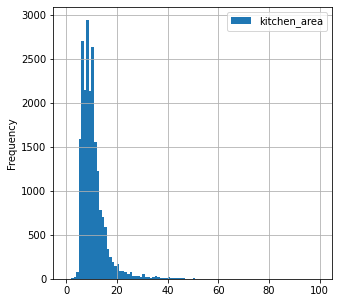

In [44]:
print(data['kitchen_area'].describe())
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, range=(0,100), figsize =(5,5))

У living_area есть также какие-то выбросы в самом начале графика. Рассмотрим их.

<AxesSubplot:ylabel='Frequency'>

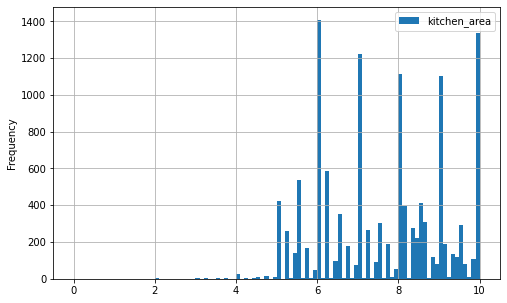

In [45]:
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, range=(0,10), figsize =(8,5))

Удалим данные до 4.5 как выбросы. 

In [46]:
print(data.shape[0])
data=data.loc[(data['kitchen_area'].isna()) | (data['kitchen_area']>4.5)]
print(data.shape[0])

23141
23076


Далее рассмотрим хвост графика.

<AxesSubplot:ylabel='Frequency'>

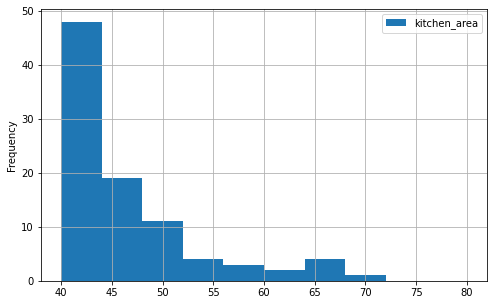

In [47]:
data.plot(y='kitchen_area', kind='hist', bins=10, grid=True, range=(40,80), figsize =(8,5))

Удалим данные после 52 как выбросы.

In [48]:
print(data.shape[0])
data=data.loc[(data['kitchen_area'].isna()) | (data['kitchen_area']<52)]
print(data.shape[0])

23076
23062


Далее изучим количество комнат, т.е. столбец rooms. Также сделаем это с помощью гистограммы и метода describe

count    23062.000000
mean         2.035253
std          0.995335
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64


<AxesSubplot:ylabel='Frequency'>

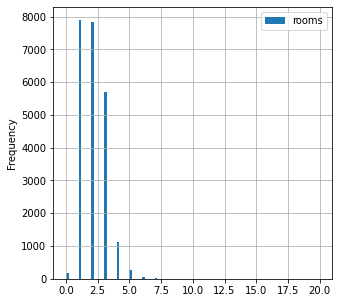

In [49]:
print(data['rooms'].describe())
data.plot(y='rooms', kind='hist', bins=100, grid=True, range=(0,20), figsize =(5,5))

В данных есть 0 значения. Это не NaN, так как график не включает в себя пропуски. Почему в каких-то объявлениях указано что комнат 0, мы не знаем, поэтому эти сомнительные показатели удалим. Также посмотрим как распределены данные по количеству комнат.

In [50]:
print(data.shape[0])
data = data[data['rooms'].isin([0])==False]
print(data.shape[0]) #проверим количество строк
data['rooms'].value_counts()

23062
22881


1     7899
2     7832
3     5698
4     1108
5      256
6       60
7       23
11       2
8        2
9        1
Name: rooms, dtype: int64

Наблюдаются выбросы, хотя разница между средним арифметическим и медианой мала, помещения у которых больше 6 комнат мы удалим из наших данных, их слишком мало для корректного анализа.

In [51]:
print(data.shape[0])
data = data[data['rooms'].isin([7,8,9,10,11])==False]
print(data.shape[0]) #проверим количество строк

22881
22853


Проверим столбец ceiling_height

count    14045.000000
mean         2.759934
std          1.260401
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


<AxesSubplot:ylabel='Frequency'>

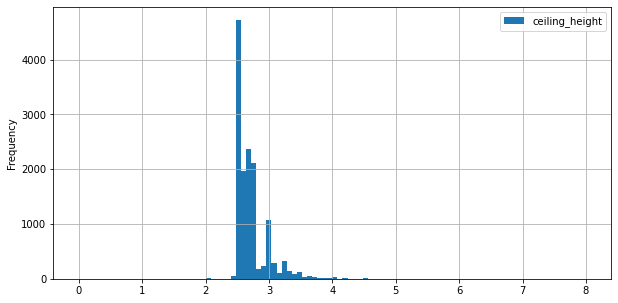

In [52]:
print(data['ceiling_height'].describe())
data.plot(y='ceiling_height', kind='hist', bins=100, grid=True, figsize =(10,5), range=(0,8))

У ceiling_height есть также какие-то выбросы в самом начале графика. Рассмотрим их

<AxesSubplot:ylabel='Frequency'>

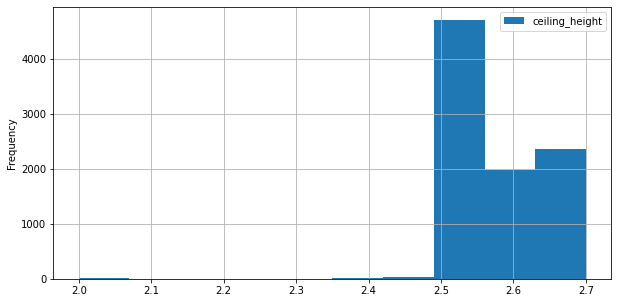

In [53]:
data.plot(y='ceiling_height', kind='hist', bins=10, grid=True, figsize =(10,5), range=(2,2.7))

Удалим данные меньше 2.47

In [54]:
print(data.shape[0])
data=data.loc[(data['ceiling_height'].isna()) | (data['ceiling_height']>2.47)]
print(data.shape[0])

22853
22791


Теперь рассмотрим хвост графика

<AxesSubplot:ylabel='Frequency'>

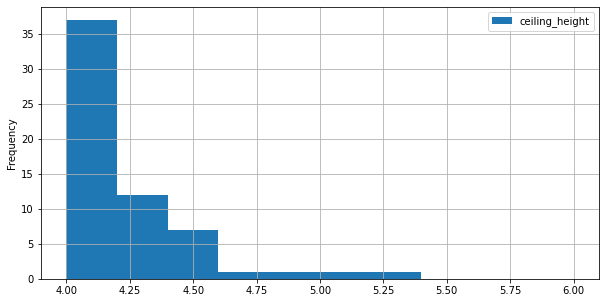

In [55]:
data.plot(y='ceiling_height', kind='hist', bins=10, grid=True, figsize =(10,5), range=(4,6))

Удалим данные больше 4.62

In [56]:
print(data.shape[0])
data=data.loc[(data['ceiling_height'].isna()) | (data['ceiling_height']<4.62)]
print(data.shape[0])

22791
22759


Проверим сколько % данных мы удалили. Напомним у нас было 23699 строчек. 

In [57]:
shape=data.shape[0]
print(f'Удалено % данных: {100-shape*100/23699}')

Удалено % данных: 3.9664120848980957


Таким образом мы проверили и подготовили к дальнейшей работе нужные нам столбцы и теперь можем переходить к следующему этапу нашей работы.

Посчитаем для нашего исследования и добавим в таблицу следующие значения:

    цена одного квадратного метра
    день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
    месяц публикации объявления
    год публикации объявления
    тип этажа квартиры (значения — «первый», «последний», «другой»)
    расстояние в км до центра города. 

### Цена одного квадратного метра

Начнём с цены одного квадратного метра. В столбце total_area хранятся данные об общей площадь квартиры в квадратных метрах. А в last_price цена на момент снятия с публикации. Разделим last_price на total_area и поместим значения в новый столбец price_one_meter

In [67]:
data['price_one_meter']=data['last_price']/data['total_area']
print(data['price_one_meter'])

0        120370.370370
1         82920.792079
2         92785.714286
4        100000.000000
5         95065.789474
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_one_meter, Length: 22759, dtype: float64


### День публикации объявления

День публикации объявления посчитаем с помощью столбца first_day_exposition, содержащий дату публикации объявления.

In [68]:
data['weekday_publication']=data['first_day_exposition'].dt.weekday
data['weekday_publication'] 

0        3
1        1
2        3
4        1
5        0
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: weekday_publication, Length: 22759, dtype: int64

### Месяц публикации объявления

Месяц публикации объявления также посчитаем с помощью столбца first_day_exposition, содержащий дату публикации объявления

In [69]:
data['month_publication']=data['first_day_exposition'].dt.month
data['month_publication']

0         3
1        12
2         8
4         6
5         9
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: month_publication, Length: 22759, dtype: int64

### Год публикации объявления

Год публикации объявления также посчитаем с помощью столбца first_day_exposition, содержащий дату публикации объявления

In [70]:
data['year_publication'] = data['first_day_exposition'].dt.year
data['year_publication']

0        2019
1        2018
2        2015
4        2018
5        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year_publication, Length: 22759, dtype: int64

### Тип этажа квартиры

Для создания столбца с типом этажа квартиры, сначала посмотрим какие значения содержатся в столбце floor, хранящим этаж объекта недвижимости. 

In [71]:
data['floor'].unique()

array([ 8,  1,  4, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15,  9, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Нулевых и сомнительных значений нет. Поэтому напишем функцию, которая присвоит каждому этажу одну из категорий: «первый», «последний» или «другой». И создадим отдельный столбец с этими категориями. 

In [72]:
def floor_category(row):
#floors_total хранит сколько всего этажей, значит и число последнего
    floors_total=row['floors_total'] 
    floor=row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category']=data.apply(floor_category, axis=1)  
#проверим дома с 1 этажом, вдруг мы ошиблись и наша функция присвоила им 
#значение “последний” а не “первый”
data[data['floors_total']==1].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_publication,month_publication,year_publication,floor_category
3076,20,2000000.0,80.0,2018-01-03,3,NaN,1,48.5,1,NaN,...,NaN,NaN,NaN,NaN,44.0,25000.000000,2,1,2018,первый
4379,5,5300000.0,58.5,2017-11-15,2,NaN,1,31.6,1,NaN,...,NaN,NaN,NaN,NaN,226.0,90598.290598,2,11,2017,первый
5300,5,2990000.0,60.0,2018-11-15,3,NaN,1,50.0,1,NaN,...,NaN,NaN,NaN,NaN,40.0,49833.333333,3,11,2018,первый
5698,7,450000.0,42.0,2017-07-31,2,NaN,1,23.0,1,NaN,...,NaN,NaN,NaN,NaN,233.0,10714.285714,0,7,2017,первый
5787,16,9000000.0,88.0,2018-08-06,3,NaN,1,NaN,1,NaN,...,0.0,NaN,1.0,792.0,60.0,102272.727273,0,8,2018,первый


Всё хорошо.  

### Расстояние в км. до центра города

Следующий столбец cityCenters_kilometer, содержащий расстояние в километрах до центра города, мы соберём с помощью столбца cityCenters_nearest, который хранит расстояние в метрах до центра города. Разделим значение столбца на 1000, чтобы получить значения в километрах, а после округлим их.

In [73]:
data['cityCenters_kilometer']=data['cityCenters_nearest']/1000
data['cityCenters_kilometer']=data['cityCenters_kilometer'].round(0)
print(data['cityCenters_kilometer'])

0        16.0
1        19.0
2        14.0
4         8.0
5         NaN
         ... 
23694     4.0
23695     NaN
23696     NaN
23697    10.0
23698     NaN
Name: cityCenters_kilometer, Length: 22759, dtype: float64


Мы создали новые колонки с данными, которые помогут нам в нашей работе и можем переходить к самому исследованию. 

### Изучим параметры объектов

Изучим следующие параметры объектов:

    общая площадь;
    жилая площадь;
    площадь кухни;
    цена объекта;
    количество комнат;
    высота потолков;
    этаж квартиры;
    тип этажа квартиры («первый», «последний», «другой»);
    общее количество этажей в доме;
    расстояние до центра города в метрах;
    расстояние до ближайшего аэропорта;
    расстояние до ближайшего парка;
    день и месяц публикации объявления.
Для каждого построим гистограмму и дадим комментарий. 

<AxesSubplot:ylabel='Frequency'>

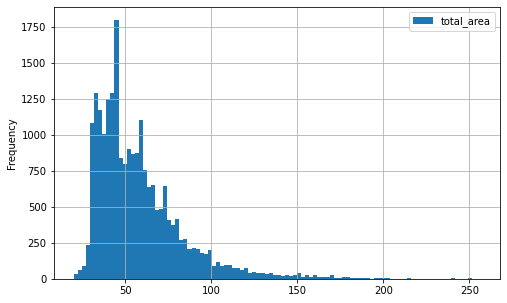

In [74]:
#жилая площадь
data.plot(y='total_area', kind='hist', bins=100, grid=True, figsize =(8,5))

Большая часть объектов имеет площадь примерно от 25 до 100 кв. метров. На графике заметно выделение нескольких пиков, скорее всего так отображаются несколько самых массовых вариантов застройки характерных для этой области. 

<AxesSubplot:ylabel='Frequency'>

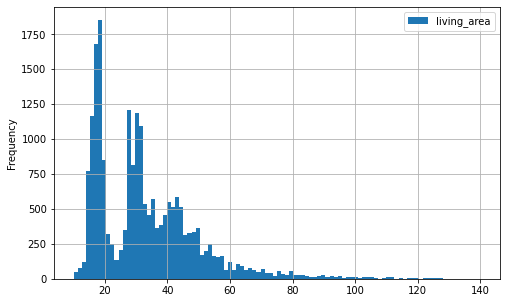

In [75]:
#жилая площадь
data.plot(y='living_area', kind='hist', bins=100, grid=True, figsize =(8,5))

Большая часть объектов имеет жилую площадь примерно от 10 до 60 кв. метров. На графике заметно выделение нескольких пиков, скорее всего так отображаются несколько самых массовых вариантов устройства объектов недвижимости характерных для этой области.

<AxesSubplot:ylabel='Frequency'>

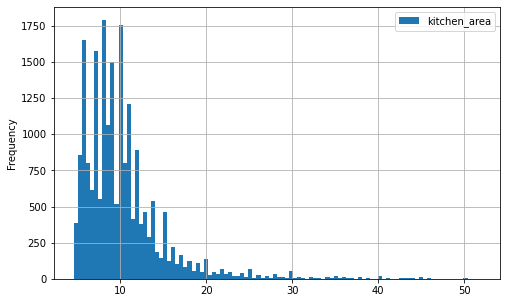

In [76]:
#площадь кухни
data.plot(y='kitchen_area', kind='hist', bins=100, grid=True, figsize =(8,5))

Большая часть объектов имеет площадь кухни примерно от 3 до 20 кв. метров. На графике заметно выделение нескольких пиков, скорее всего так отображаются несколько самых массовых вариантов устройства объектов недвижимости характерных для этой области.

<AxesSubplot:ylabel='Frequency'>

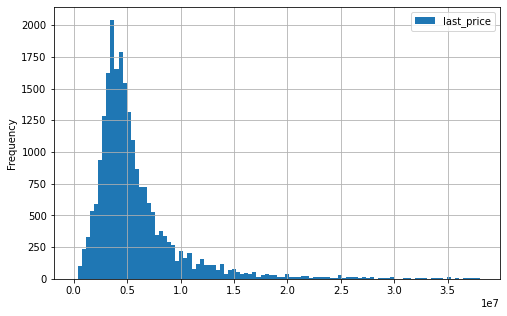

In [77]:
#цена объекта
data.plot(y='last_price', kind='hist', bins=100, grid=True, figsize =(8,5))

Большая часть объектов продалась примерно от 1000000 до 1000000. График имеет почти ровную горку, имеется два небольших пика наверху. Возможно их создали объекты построенные в одних районах и проданные по одним ценам. 

<AxesSubplot:ylabel='Frequency'>

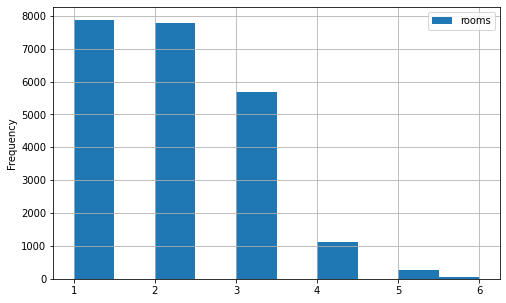

In [78]:
#количество комнат
data.plot(y='rooms', kind='hist', bins=10, grid=True, figsize =(8,5))

Большая часть наших объектов имеет от 1 до 3 комнат. Как наверное и большая часть всех жилых объектов в нашей стране. 

<AxesSubplot:ylabel='Frequency'>

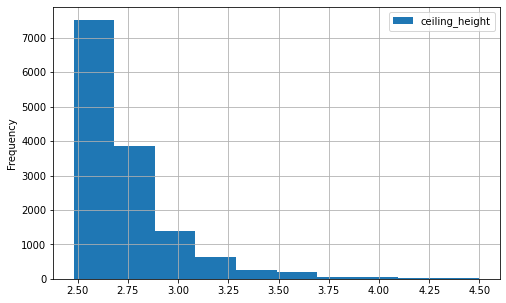

In [79]:
#высота потолков
data.plot(y='ceiling_height', kind='hist', bins=10, grid=True, figsize =(8,5))

Большая часть объектов имеет высоту потолка примерно от 2.40 до 2.80 метров. На наш взгляд, это немного выше обычного по стране.

<AxesSubplot:ylabel='Frequency'>

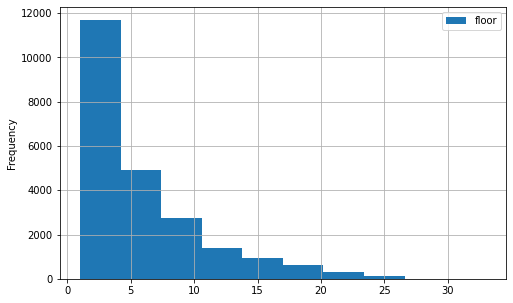

In [80]:
#этаж квартиры
data.plot(y='floor', kind='hist', bins=10, grid=True, figsize =(8,5))

Большая часть объектов расположена с 1 по 6 этаж. Что, на наш взгляд, и является нормой, так как домов с большим количеством этажей не так много.

<AxesSubplot:xlabel='floor_category'>

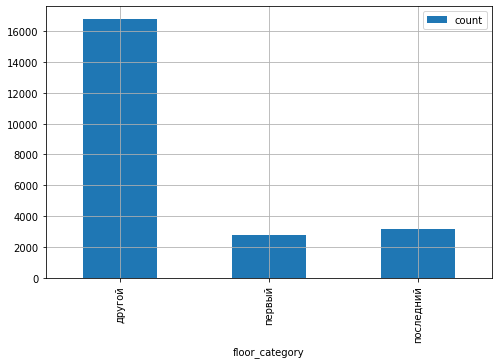

In [81]:
#тип этажа квартиры 
floor_category_hist=data.pivot_table(index='floor_category',values='total_images', aggfunc=['count'])
floor_category_hist.columns=['count']
floor_category_hist=floor_category_hist.reset_index()
floor_category_hist.plot(kind='bar',x='floor_category', grid=True, figsize =(8,5))

Больше всего этаже в категории “другой”. Ну и квартир между 1 и последним этажом больше, чем первых и последних квартир в сумме в многоэтажном доме. Поэтому тут всё нормально. 

<AxesSubplot:ylabel='Frequency'>

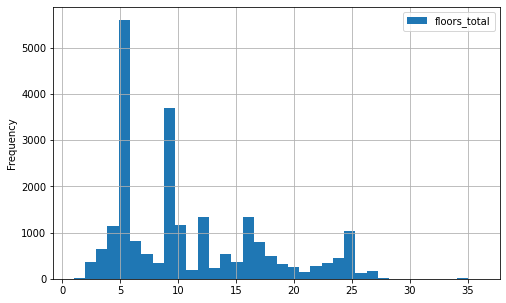

In [82]:
#общее количество этажей в доме
data.plot(y='floors_total', kind='hist', bins=36, grid=True, figsize =(8,5))

График сам по себе напоминает застройку в городе, где есть многоэтажки, но какие-то дома стоят намного выше остальных. Пики на нашем графике, скорее всего выделяют самые массовые варианты многоэтажных домов, это дома с 5 и 9 этажами.  

По графику можно увидеть что существует несколько больших групп: примерно с 3000 по 6000 метров, и с 11000 по 17000 метров, второй является самым большим, в нём либо находится больше всего домов, либо там идут самые активные продажи, ну или и то и то.

<AxesSubplot:ylabel='Frequency'>

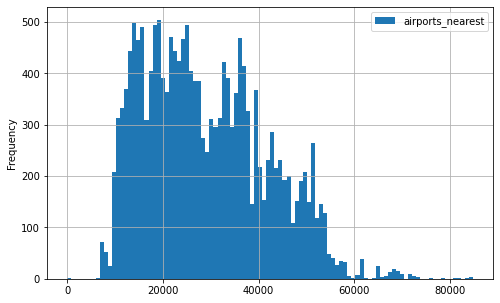

In [84]:
#расстояние до ближайшего аэропорта
data.plot(y='airports_nearest', kind='hist', bins=100, grid=True, figsize =(8,5))

Большинство объектов отдалены от ближайшего аэропорта с 10000 по 40000 метров. 

<AxesSubplot:ylabel='Frequency'>

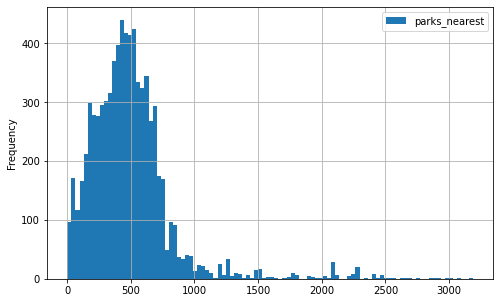

In [85]:
#расстояние до ближайшего парка
data.plot(y='parks_nearest', kind='hist', bins=100, grid=True, figsize =(8,5))

Можно увидеть что к большинству объектов парки находятся очень близко, на расстояние от 0 до 750 метров.

<AxesSubplot:ylabel='Frequency'>

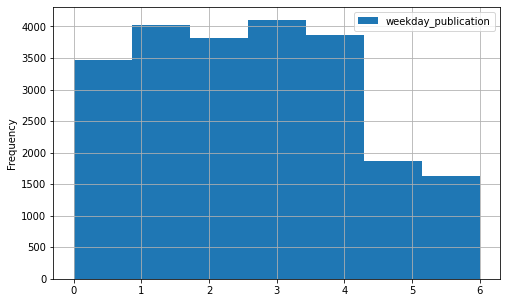

In [86]:
#День публикации
data.plot(y='weekday_publication', kind='hist', bins=7, grid=True, figsize =(8,5))

По графику можно сделать однозначный вывод: в большинстве своём людям свойственно публиковать объявления в будние дни, в выходные этот показатель примерно в два раза меньше. 
Было бы интересно узнать когда людям наоборот свойственно просматривать объявления, возможно пользователям стоит советовать просматривать объявления также в будние дни. 

<AxesSubplot:ylabel='Frequency'>

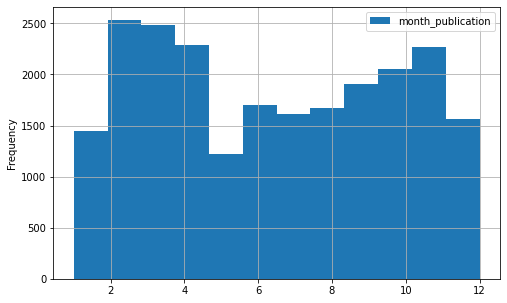

In [87]:
#месяц публикации объявления
data.plot(y='month_publication', kind='hist', bins=12, grid=True, figsize =(8,5))

По графику можно сделать вывод: в большинстве своём людям свойственно публиковать объявления немного чаще с февраля по апрель и с сентября по ноябрь. 

### Анализ времени продажи объектов

Изучим как быстро продавались объекты. Нужные для этого данные хранятся в столбце days_exposition. Для начала посмотрим как значения этого столбца распределятся на гистограмме. 

<AxesSubplot:ylabel='Frequency'>

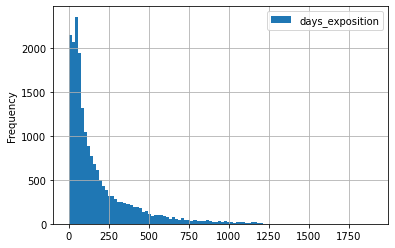

In [88]:
data.plot(y='days_exposition', kind='hist', bins=100, grid=True, range=(0,1900))

Мы видим по большей части нормальное распределение, где большая часть сосредоточена в отрезке примерно первых 500 дней. Построим диаграмму размаха, а также выведем статистические параметры данного столбца с помощью метода describe()

count    19717.000000
mean       175.935132
std        207.254822
min          1.000000
25%         45.000000
50%         95.000000
75%        228.000000
max       1218.000000
Name: days_exposition, dtype: float64

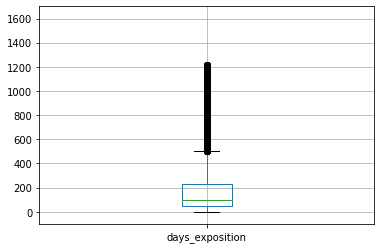

In [89]:
plt.ylim(-100, 1700)
data.boxplot('days_exposition')
data['days_exposition'].describe()

Итак, если считать день снятия публикации днём продажи, то исходя из наших расчетов в среднем для продажи требуется 95 дней, таков медианный показатель. Есть ещё среднее арифметическое равное 175 дням, однако на этот показатель сильно влияют выбросы (тот же максимальный показатель  в 1218 дней), поэтому мы считаем его неадекватным показателем для нашего исследования.Быстрыми продажами будем считать те, что заключались в 25% квартильного подсчёта, а это до 45 дня. Долгими те, что длятся больше 75% квартильного подсчёта, а это 228 дня.

### Анализ зависимости цены от разных факторов

Далее изучим влияние на цену следующих факторов:

    общая площадь - столбец total_area
    жилая площадь - столбец living_area
    площадь кухни - столбец kitchen_area
    количество комнат - столбец rooms
    тип этажа - столбец floor_category
    день недели размещения - столбец weekday_publication
    месяц размещения - столбец month_publication
    год размещения - столбец year_publication
Для изучения зависимости между ценой и каждым из этих параметров мы будем строить графики и высчитывать корреляцию методом corr(), там где это возможно.

Начнём с зависимости между  общей площадью (столбец total_area) и ценой (столбец last_price). Построим два графика: первый обычный график разброса, а второй график на основе сводной таблицы с усредненными показателями цены.

In [90]:
print('Корреляция между ценой и общей площадью:',
      data['last_price'].corr(data['total_area']))

Корреляция между ценой и общей площадью: 0.7796924698445346


<AxesSubplot:xlabel='total_area', ylabel='last_price'>

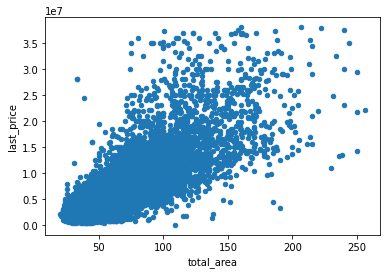

In [91]:
data.plot(y='last_price', x='total_area', kind='scatter')

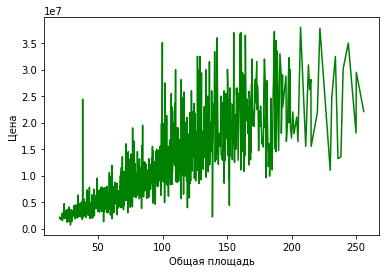

In [92]:
pivot_total_area=data.pivot_table(index='total_area', values='last_price', aggfunc=['mean'])
plt.plot(pivot_total_area.index,pivot_total_area['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('Общая площадь')
plt.show()

Итого, корреляция между ценой и общей площадью примерно 0.78. По подсчету корреляции и графикам можно утверждать что зависимость присутствует. Она не такая однозначная, по тому как нарисован график можно утверждать, что в среднем с увеличением общей площади происходит увеличение размаха между минимальной и максимальной ценой за одну и туже площадь разных объектов. В среднем цена с увеличением площади растет.

Перейдем к зависимости между жилой площадью (столбец living_area) и ценой (столбец last_price). Построим два графика: первый обычный график разброса, а второй график на основе сводной таблицы с усредненными показателями цены.

In [93]:
print('Корреляция между ценой и жилой площадью:',
      data['last_price'].corr(data['living_area']))

Корреляция между ценой и жилой площадью: 0.6671234008030545


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

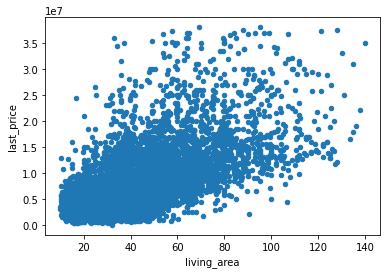

In [94]:
data.plot(y='last_price', x='living_area', kind='scatter')

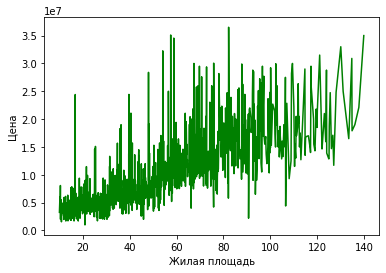

In [95]:
pivot_living_area=data.pivot_table(index='living_area', values='last_price', aggfunc=['mean'])
plt.plot(pivot_living_area.index,pivot_living_area['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('Жилая площадь')
plt.show()

Итого, корреляция между ценой и общей площадью примерно 0.67. По подсчету корреляции и графикам можно утверждать что зависимость присутствует. В среднем цена с увеличением площади растет, однако смотря более детально, растёт скорее разница между минимальной и максимальной ценой объекта.

Перейдем к зависимости между площадью кухни (столбец kitchen_area) и ценой (столбец last_price). Построим два графика: первый обычный график разброса, а второй график на основе сводной таблицы с усредненными показателями цены.

In [96]:
print('Корреляция между ценой и площадью кухни:',
      data['last_price'].corr(data['kitchen_area']))

Корреляция между ценой и площадью кухни: 0.5954182467260096


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

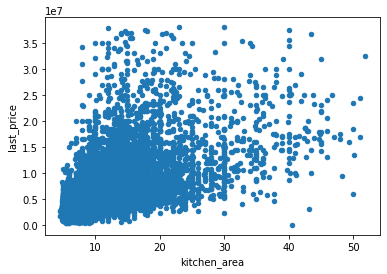

In [97]:
data.plot(y='last_price', x='kitchen_area', kind='scatter')

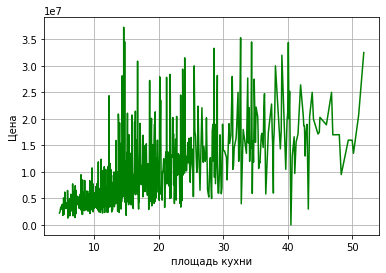

In [98]:
pivot_kitchen_area=data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['mean'])
plt.plot(pivot_kitchen_area.index,pivot_kitchen_area['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('площадь кухни')
plt.grid(True)
plt.show()

Итак, корреляция между ценой и площадью кухни примерно 0.59. По подсчету корреляции и графикам можно утверждать что зависимость присутствует. В среднем цена с увеличением площади растет, однако смотря более детально, растёт скорее разница между минимальной и максимальной ценой объекта.

Перейдем к зависимости между количеством комнат (столбец rooms) и ценой (столбец last_price). Построим два графика: первый обычный график разброса, а второй график на основе сводной таблицы с усредненными показателями цены.

In [99]:
print('Корреляция между ценой и количеством комнат:',
      data['last_price'].corr(data['rooms']))

Корреляция между ценой и количеством комнат: 0.48288336681387845


<AxesSubplot:xlabel='rooms', ylabel='last_price'>

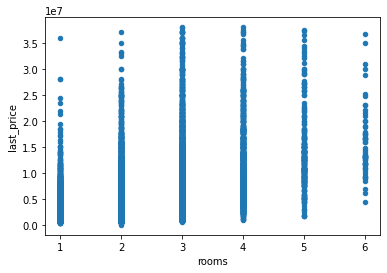

In [100]:
data.plot(y='last_price', x='rooms', kind='scatter')

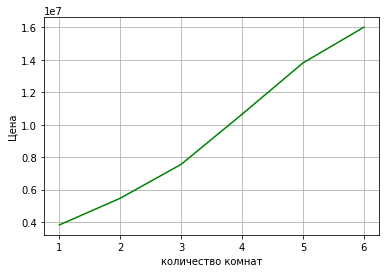

In [101]:
pivot_rooms=data.pivot_table(index='rooms', values='last_price', aggfunc=['mean'])
plt.plot(pivot_rooms.index,pivot_rooms['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('количество комнат')
plt.grid(True)
plt.show()

Итого, корреляция между ценой и количеством комнат примерно 0.48. Корреляция не большая. Усреднённый график (с зелёной линией) показывает рост средней цены с увеличением количества комнат. Если посмотреть на график разброса, то мы можем заметить что все типы объектов, независимо от количества комнат, можно найти в первом нижнем диапазоне цены. По нашему мнению, можно утверждать, что в диапазоне от 1 до 4 комнат, есть зависимость между количеством комнат и ценой, чем больше комнат, тем больше размах между минимальной и максимальной ценой объектов с одинаковым количеством комнат. Наличие зависимость с большим количеством комнат (т.е. больше 4), нуждается в дополнительном исследование с большим количеством данных, мы делаем этот вывод исходя из графика разброса, так как разброс точек после 4 комнат немного сужается и точно не увеличивается. И хотя средняя цена после 4 также растёт, возможно это вызвано малым количеством данных с объектами больше 4 комнат. Из-за чего мы утверждаем только про первые 4 позиции, т.е. от 1 до 4 комнат. 

Перейдем к зависимости между типом этажа (столбец floor_category) и ценой (столбец last_price). Построим график на основе сводной таблицы с усредненными показателями цены. 

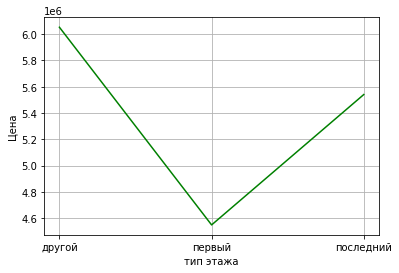

In [102]:
pivot_floor_category=data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean'])
plt.plot(pivot_floor_category.index,pivot_floor_category['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('тип этажа')
plt.grid(True)
plt.show()

Можно утверждать, что в среднем цена объектов на первом этаже самая низкая, дальше идут объекты находящиеся на последнем этаже, и выше всех по цене в среднем стоят объекты находящиеся между 1 и последним этажом.  

Перейдем к зависимости между днём недели размещения (столбец weekday_publication) и ценой (столбец last_price). Построим два графика: первый обычный график разброса, а второй график на основе сводной таблицы с усредненными показателями цены.

In [103]:
print('Корреляция между ценой и днём недели размещения:',
      data['last_price'].corr(data['weekday_publication']))

Корреляция между ценой и днём недели размещения: -0.015115322166920114


<AxesSubplot:xlabel='weekday_publication', ylabel='last_price'>

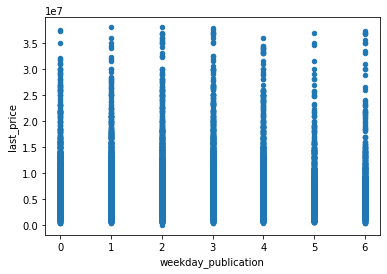

In [104]:
data.plot(y='last_price', x='weekday_publication', kind='scatter')

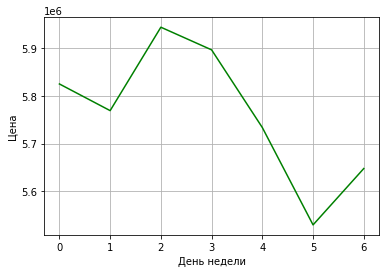

In [105]:
pivot_weekday_publication=data.pivot_table(index='weekday_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_weekday_publication.index,pivot_weekday_publication['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('День недели')
plt.grid(True)
plt.show()

Корреляция между ценой и днём недели размещения примерно 0.01. Зависимости либо нет, либо она сложнее чем линейная взаимосвязь. График с усредненной ценой (зелёная линия) и показывает что к среде средняя цена увеличивается и достигает пика, а к субботе падает и достигает самого маленького значения, к воскресенью немного поднимается, но даже уровня понедельника не достигает. То есть можно утверждать, что в будние дни в среднем назначают самую высокую цену. 

Перейдем к зависимости между месяцем размещения (столбец month_publication) и ценой (столбец last_price). Построим два графика: первый обычный график разброса, а второй график на основе сводной таблицы с усредненными показателями цены.

In [106]:
print('Корреляция между ценой и месяцем размещения:',
      data['last_price'].corr(data['month_publication']))

Корреляция между ценой и месяцем размещения: 0.004528313193637638


<AxesSubplot:xlabel='month_publication', ylabel='last_price'>

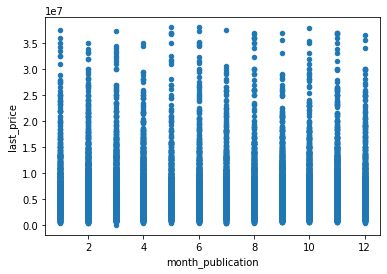

In [107]:
data.plot(y='last_price', x='month_publication', kind='scatter')

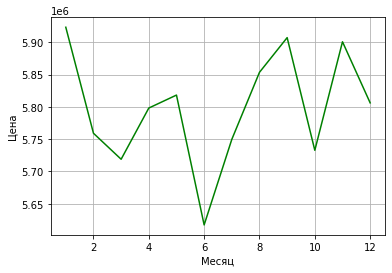

In [108]:
pivot_month_publication=data.pivot_table(index='month_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_month_publication.index,pivot_month_publication['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('Месяц')
plt.grid(True)
plt.show()

Корреляция между ценой и месяцем размещения примерно 0.004. Зависимости либо нет, либо она сложнее чем линейная взаимосвязь. На основе графиков, мы считаем, что можно утверждать что самую высокую цену люди в среднем назначают в январе, а самую маленькую в июне.

Перейдем к зависимости между годом размещения (столбец year_publication) и ценой (столбец last_price). Построим два графика: первый обычный график разброса, а второй график на основе сводной таблицы с усредненными показателями цены.

In [109]:
print('Корреляция между ценой и годом размещения:',
      data['last_price'].corr(data['year_publication']))

Корреляция между ценой и годом размещения: -0.029525973006992355


<AxesSubplot:xlabel='year_publication', ylabel='last_price'>

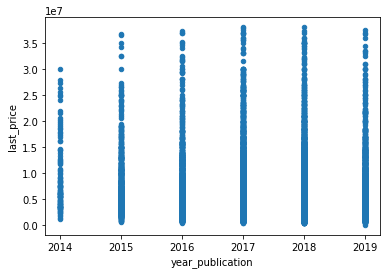

In [110]:
data.plot(y='last_price', x='year_publication', kind='scatter')

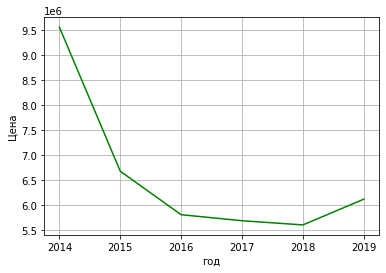

In [111]:
pivot_year_publication=data.pivot_table(index='year_publication', values='last_price', aggfunc=['mean'])
plt.plot(pivot_year_publication.index,pivot_year_publication['mean']['last_price'], 'g-')
plt.ylabel('Цена')
plt.xlabel('год')
plt.grid(True)
plt.show()

Заметно некоторое несоответствие между графиками. Посмотрим как данные про годы продажи распределены внутри.

In [112]:
data['year_publication'].value_counts()

2018    8251
2017    7849
2019    2787
2016    2683
2015    1077
2014     112
Name: year_publication, dtype: int64

Данные представлены не равномерно. Можно взять наиболее большие группы данных, с 2015 по 2019 год. Если посмотреть на усредненный график, и рассматривать только отрезок с 2015 по 2019, то можно заметить что зависимость есть, с 2015 года по 2018 средняя цена падала, а в 2019 стала расти, но уровня 2015 года не достигла. 

Попробуем немного разобраться с чем связано падение и возвышение цен по годам. Хотя на рынок недвижимости могут влиять многие факторы, от экономики до политики, мы постараемся посмотреть как менялась средняя площадь проданных объектов с 2015 по 2019 год используя только доступные нам данные. Разумно предположить что у этих объектов была разная средняя общаяя и жилая площади, как мы выяснили выше у этих параметров одна из самых высоких корреляций с ценой. 

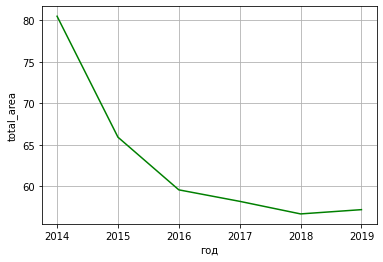

In [113]:
year_total_area=data.pivot_table(index='year_publication', values='total_area', aggfunc=['mean'])
plt.plot(year_total_area.index,year_total_area['mean']['total_area'], 'g-')
plt.ylabel('total_area')
plt.xlabel('год')
plt.grid(True)
plt.show()

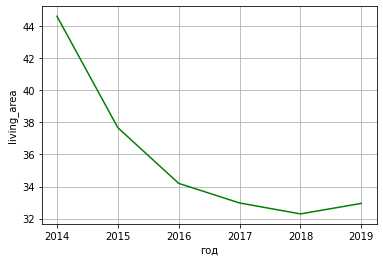

In [114]:
year_living_area=data.pivot_table(index='year_publication', values='living_area', aggfunc=['mean'])
plt.plot(year_living_area.index,year_living_area['mean']['living_area'], 'g-')
plt.ylabel('living_area')
plt.xlabel('год')
plt.grid(True)
plt.show()

Оба графика почти совпадают с графиком зависимости между годом и средней ценой объекта. Возможно с 2014 по 2018 года число объектов с большой площадью на рынке сокращалось, или покупатели в среднем предпочитали жильё поменьше, а в 2019 году требования по площади у людей опять выросли. Возможно это также связано с экономическим благосостоянием населения в эти годы, но это всё требует дополнительных исследований с большим количеством данных. 

### Рейтинг населённых пунктов с самым дорогим кв. метром 

Для составления рейтинга 10 населённых пунктов с самым дорогим кв. метром, при этом эти 10 населённых пунктов будут с наибольшим числом объявлений, чтобы у нас был более адекватный подсчет. Данные хранящие названия населенных пунктов мы уже обработали, это столбец locality_name. А данные с ценой одного квадратного метра мы заранее подсчитали и поместили в столбец price_one_meter. 

In [115]:
#создадим сводную таблицу где у каждого поселения будет указано количество объявлений
#и средняя цена за квадратный метр
ten_locality=data.pivot_table(index='locality_name', values ='price_one_meter', 
                              aggfunc=['count', 'mean'])
ten_locality.columns = ['count', 'mean'] #уберем мультииндексы
#построим таблицу по убыванию кол-во объявлений и оставим только 10 первых
ten_locality=ten_locality.sort_values('count', ascending = False).head(10)
#построим таблицу по убыванию средней цены квадратного метра
ten_locality.sort_values('mean', ascending = False)

,count,mean
locality_name,,
Санкт-Петербург,15011,111117.387359
Пушкин,355,102856.256666
Кудрово,446,95078.986405
посёлок Парголово,320,90406.049365
Мурино,550,85266.619622
посёлок Шушары,433,78264.189974
Колпино,336,75352.475583
Гатчина,304,68776.862945
Всеволожск,389,68728.997083


<AxesSubplot:xlabel='locality_name'>

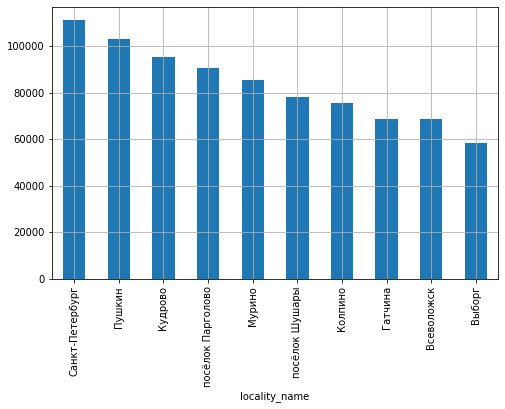

In [116]:
#для наглядности представим наши результаты в виде графика 
ten_locality_plot=ten_locality.sort_values('mean', ascending = False)
ten_locality_plot=ten_locality_plot.pop('mean')
ten_locality_plot.plot(kind='bar',y='floor_category', grid=True, figsize =(8,5))

Самая высокая цена квадратного метра в Санкт-Петербурге (114535.4), а самая низкая в Выборге (58141.9).

### Зависимость цены в Санкт-Петербурге от удалённости от центра

Посчитаем зависимость цены в Санкт-Петербурге от удалённости от центра. Объявления из нужного нам города выделим с помощью данных в столбце locality_name, данные цены хранит столбец last_price, а данные об удаленности объекта от центра возьмём в столбце cityCenters_kilometer, созданным нами ранее.

In [117]:
#создадим новый датафрейм с нужными данными
data_sbp=data[data['locality_name']=='Санкт-Петербург']
#теперь сделаем из него сводную таблицу где каждому километру припишем среднюю цену
data_sbp=data_sbp.pivot_table(index='cityCenters_kilometer', values ='last_price', 
                              aggfunc='mean')
data_sbp.columns=['mean']
#добавим столбец копирующий километры, чтобы удобнее считать корреляцию и сделать график
data_sbp['kilometer']=data_sbp.index*1 
print(data_sbp.corr()) #посчитаем корреляцию
data_sbp

              mean  kilometer
mean       1.00000   -0.83422
kilometer -0.83422    1.00000


,mean,kilometer
cityCenters_kilometer,,
0.0,1.479883e+07,0.0
1.0,1.189025e+07,1.0
2.0,1.098878e+07,2.0
3.0,9.848699e+06,3.0
4.0,1.065175e+07,4.0
5.0,1.099517e+07,5.0
6.0,1.029103e+07,6.0
7.0,1.042312e+07,7.0
8.0,8.932602e+06,8.0


<AxesSubplot:xlabel='kilometer', ylabel='mean'>

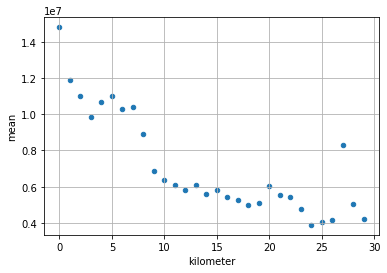

In [118]:
data_sbp.plot(y='mean', x='kilometer', kind='scatter', grid=(True))

Корреляция высокая:0.83. В общем в Санкт-Петербурге можно наблюдать снижение средней цены за объект недвижимости по мере удаления от центра. Есть однако нюансы. Так с 0 по 3 километр средняя цена идёт вниз, после до 5 километра немного поднимается, после цена в основном падает. Однако на 27 километре средняя цена опять повышается более чем в два раза относительно соседних километров.

Попробуем немного разобраться с чем связано падение и возвышение цен по километрам. Хотя на рынок недвижимости в России так устроен что центр города как правило стоит дороже только потому что это центр. Однако, разумно предположить что у этих объектов была разная средняя общая и жилая площади, как мы выяснили выше у этих параметров одна из самых высоких корреляций с ценой.

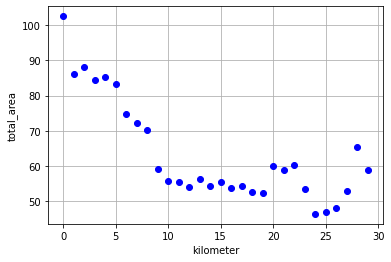

In [119]:
data_sbp_total_area=data[data['locality_name']=='Санкт-Петербург']
#теперь сделаем сводную таблицу где каждому километру припишем среднюю цену
data_sbp_total_area=data_sbp_total_area.pivot_table(index='cityCenters_kilometer', 
                                                  values ='total_area', aggfunc='mean')
plt.plot(data_sbp_total_area.index,data_sbp_total_area['total_area'], 'bo')
plt.ylabel('total_area')
plt.xlabel('kilometer')
plt.grid(True)
plt.show()

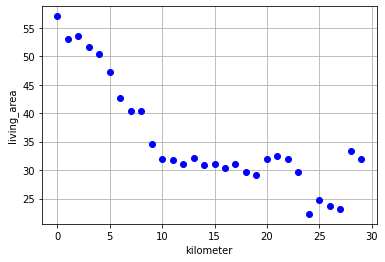

In [120]:
data_sbp_living_area=data[data['locality_name']=='Санкт-Петербург']
#теперь сделаем сводную таблицу где каждому километру припишем среднюю цену
data_sbp_living_area=data_sbp_living_area.pivot_table(index='cityCenters_kilometer', 
                                                  values ='living_area', aggfunc='mean')
plt.plot(data_sbp_total_area.index,data_sbp_living_area['living_area'], 'bo')
plt.ylabel('living_area')
plt.xlabel('kilometer')
plt.grid(True)
plt.show()

Хотя оба графика площадей имеют общий тренд на снижение по мере увеличения километра, графики площадей не похожи в деталях на первоначальный график зависимости средней цены от километра. Поэтому мы попробуем посчитать какие типы квартир предоставлялись на каждом километре, и сколько объявлений вообще было на каждом километре.  

In [121]:
data_sbp_floor_category=data[data['locality_name']=='Санкт-Петербург']
#теперь сделаем сводную таблицу где каждому километру припишем среднюю цену
data_sbp_floor_category=data_sbp_floor_category.pivot_table(index='cityCenters_kilometer', 
                                                            columns='floor_category',
                                                            values ='total_images',
                                                            aggfunc='count')
data_sbp_floor_category.columns=['другой', 'первый', 'последний']
data_sbp_floor_category=data_sbp_floor_category.fillna(0)
data_sbp_floor_category['общее количество']=data_sbp_floor_category['другой']+data_sbp_floor_category['первый']+data_sbp_floor_category['последний']
data_sbp_floor_category

,другой,первый,последний,общее количество
cityCenters_kilometer,,,,
0.0,12.0,3.0,3.0,18.0
1.0,103.0,19.0,39.0,161.0
2.0,152.0,42.0,68.0,262.0
3.0,198.0,53.0,73.0,324.0
4.0,461.0,75.0,105.0,641.0
5.0,624.0,74.0,126.0,824.0
6.0,403.0,59.0,78.0,540.0
7.0,291.0,29.0,55.0,375.0
8.0,455.0,51.0,64.0,570.0


Итак, мы видим что количество объявлений для каждого километра сильно не неравномерно. На 0 километре 18 объявлений, а на 1 уже 161. Так на первоначальном графике с 4 по 5 километр была горка, если посмотреть на таблицу то можно заметить что и тут на 4 и 5 километре значение общего количества объявлений резко увеличиваются. А пик который приходился на 27 километр, вообще представлен двумя объявлениями, т.е. эти данные не могут адекватно отразить среднюю цену. 

Для более лучшего анализа взаимозависимости километра, цены и прочих факторов требуется больше данных по разным километрам, а также более сложные модели анализа. В нашем же исследование, мы считаем правоверным утверждать, что в среднем по удалённости от центра средняя цена снижается. 

Наше исследование закончено. Все результаты вместе соберём в общем выводе.

## Общий вывод

Наше исследование было посвящено анализу данных объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Наша цель состояла в том, чтобы определить как разные параметры влияют на рыночную стоимость объектов недвижимости. 
    Прежде чем приступать к исследованию мы провели предобработку данных: привели разные вариации наименований одних и тех же населенных пунктов к одной вариации, часть данных к типу данных с которым можем работать, удалили неадекватные показатели там где где это помешало бы нашей работе. Также из имеющихся данных путем дополнительных вычислений мы создали новые колонки данных, которые были нужны для нашего исследования. 
    Отдельно отметим, что нами было принято решение не заполнять пропуски в данных медианными значениями, как это обычно делается в случае пропусков. Мы приняли это решение исходя из того что, во-первых, данных не так много, поэтому медианные значения могут быть далеки от реальных, во-вторых, мы имеем дело с жилой недвижимостью которая в разные исторические эпохи имела разные характеристики, и получить в таком случае адекватные медианные значения будет маловероятно. 
Перейдём к результатам исследования.

     Если считать день снятия публикации днём продажи, то исходя из наших расчетов в среднем для продажи требуется 95 дней, таков медианный показатель. Есть ещё среднее арифметическое равное 175 дням, однако на этот показатель сильно влияют выбросы (тот же максимальный показатель в 1218 дней), поэтому мы считаем его неадекватным показателем для нашего исследования.Быстрыми продажами будем считать те, что заключались в 25% квартильного подсчёта, а это до 45 дня. Долгими те, что длятся больше 75% квартильного подсчёта, а это 228 дня.

    Корреляция между ценой и общей площадью: 0.78. По подсчету корреляции и графикам можно утверждать что зависимость присутствует. Она не такая однозначная, по тому как нарисован график можно утверждать, что с увеличением общей площади происходит увеличение размаха между минимальной и максимальной ценой за одну и туже площадь разных объектов. В среднем цена с увеличением площади растет.

    Корреляция между ценой и общей площадью: 0.67. По подсчету корреляции и графикам можно утверждать что зависимость присутствует. В среднем цена с увеличением площади растет, однако смотря более детально, растёт скорее разница между минимальной и максимальной ценой объекта.

    Корреляция между ценой и площадью кухни примерно 0.59. По подсчету корреляции и графикам можно утверждать что зависимость присутствует. В среднем цена с увеличением площади растет, однако смотря более детально, растёт скорее разница между минимальной и максимальной ценой объекта.

    Корреляция между ценой и количеством комнат примерно 0.48. Корреляция не большая. График средней цены показывает рост цены с увеличением количества комнат. Если посмотреть на график разброса, то мы можем заметить что все типы объектов, независимо от количества комнат, можно найти в первом нижнем диапазоне цены. По нашему мнению, можно утверждать, что в диапазоне от 1 до 4 комнат, есть зависимость между количеством комнат и ценой, чем больше комнат, тем больше размах между минимальной и максимальной ценой объектов с одинаковым количеством комнат. Наличие зависимость с большим количеством комнат (т.е. больше 4), нуждается в дополнительном исследование с большим количеством данных, мы делаем этот вывод исходя из графика разброса, так как разброс точек после 4 комнат немного сужается и точно не увеличивается. И хотя средняя цена после 4 также растёт, возможно это вызвано малым количеством данных с объектами больше 4 комнат. Из-за чего мы утверждаем только про первые 4 позиции, т.е. от 1 до 4 комнат.

    Можно утверждать, что в среднем цена объектов на первом этаже самая низкая, дальше идут объекты находящиеся на последнем этаже, и выше всех по цене в среднем стоят объекты находящиеся между 1 и последним этажом.

    Корреляция между ценой и днём недели размещения примерно 0.01. Зависимости либо нет, либо она сложнее чем линейная взаимосвязь. График с усредненной ценой показывает что к среде средняя цена увеличивается и достигает пика, а к субботе падает и достигает самого маленького значения, к воскресенью немного поднимается, но даже уровня понедельника не достигает. То есть можно утверждать, что в будние дни в среднем назначают самую высокую цену.

    Корреляция между ценой и месяцем размещения примерно 0.004. Зависимости либо нет, либо она сложнее чем линейная взаимосвязь. На основе графиков, мы считаем, что можно утверждать что самую высокую цену люди в среднем назначают в январе, а самую маленькую в июне.

    Корреляция между ценой и годом размещения: 0.05. Зависимости либо нет, либо она сложнее чем линейная взаимосвязь. Если посмотреть на график усредненной цены, то можно заметить что зависимость есть, с 2014 года по 2018 средняя цена падала, а в 2019 стала немного расти. Мы также сравнили распределение по годам средней общей и средней жилой площади, оба графика вели себя также как график зависимости средней цены и года. Возможно с 2014 по 2018 года число объектов с большой площадью на рынке сокращалось, или покупатели в среднем предпочитали жильё поменьше, а в 2019 году требования по площади у людей опять выросли. Возможно это также связано с экономическим благосостоянием населения в эти годы, но это всё требует дополнительных исследований с большим количеством данных.

    Самая высокая цена квадратного метра в Санкт-Петербурге (111117.3), а самая низкая в Выборге (58238.9). Рейтинг 10 самых дорогих квадратных метров в 10 населенных пунктах с наибольшим количеством объявлений можно посмотреть в разделе 4.4 данной работы. 

    Корреляция между ценой в Санкт-Петербурге и удалённости от центра:0.83. Корреляция высокая. Однако график зависимости средней цены от километра содержал пики и ямки, происхождение которых мы попытались выяснить. Графики зависимости километра расположения и средней площади, как общей так и жилой, также показывали снижение этих показателей по мере удаленности от центра. Однако пики и ямки на этих графиках не совпадают с пиками и ямками на графике зависимости средней цены от километра. Дальнейший анализ показал что количество объявлений для каждого километра сильно не неравномерно. Для более лучшего анализа взаимозависимости километра, цены и прочих факторов требуется больше данных по разным километрам, а также более сложные модели анализа. В нашем же исследование, мы считаем правомерным утверждать, что в среднем по удалённости от центра средняя цена снижается.


Также мы хотим дать отдельно несколько советов для разработки будущей системы:

    Пусть пользователь не сможет сам писать название населённого пункта, пусть у него будет возможность выбрать из уже заготовленного списка. Так анализировать данные в автоматическом режиме будет намного легче. 
    
    Предусмотреть заранее в каких столбцах пользователю нельзя будет писать 0. Например 0 комнат, 0 этажей в доме и прочее. Возможно пользователи указывают это по ошибке. Но такие данные становятся не адекватными для анализа и их приходится удалять. 